The aim is to see whether year(the game was released) is associated with GLOBAL SALES.

null hypothesis(H0):Avg sales of stratergy and action games are equal.
Alternate hypothesis(H1):Avg sales of strategy games is less than action games.

In [39]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [40]:
df=pd.read_csv(r'D:\CSEbtech(amritha)\sem5\19cse304\my application\vgsales.csv')

In [41]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [42]:
genre_and_globalsales = df[['Genre', 'Global_Sales']]
genre_and_globalsales

,Genre,Global_Sales
0,Sports,82.74
1,Platform,40.24
2,Racing,35.82
3,Sports,33.00
4,Role-Playing,31.37
...,...,...
16593,Platform,0.01
16594,Shooter,0.01
16595,Racing,0.01
16596,Puzzle,0.01


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

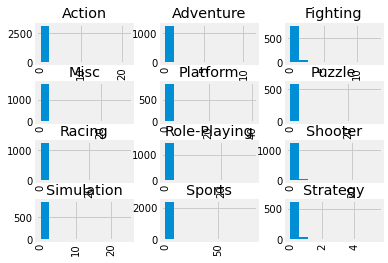

In [44]:
genre_and_globalsales.hist(by='Genre',)
plt.show()

#lets take two genre into consideration i.e :- action and stratergy type of games

In [45]:
action=genre_and_globalsales['Global_Sales'] [genre_and_globalsales['Genre'] == 'Action']

In [46]:
action

16       21.40
17       20.81
23       16.38
24       16.15
38       13.10
         ...  
16564     0.01
16567     0.01
16582     0.01
16583     0.01
16589     0.01
Name: Global_Sales, Length: 3316, dtype: float64

In [47]:
strategy=genre_and_globalsales['Global_Sales'] [genre_and_globalsales['Genre'] == 'Strategy']

In [48]:
strategy

165      5.45
204      5.01
217      4.83
267      4.21
335      3.70
         ... 
16510    0.01
16532    0.01
16539    0.01
16555    0.01
16566    0.01
Name: Global_Sales, Length: 681, dtype: float64

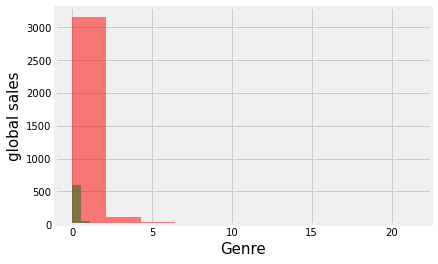

In [49]:
import seaborn as sns
action.hist(histtype='stepfilled',color='red', alpha=.5, bins=10)   # default number of bins = 10
strategy.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("green", .75), bins=10)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('global sales',fontsize=15)
plt.show()

the plot shows us that the global sales of games belonging to the genre of "action" has more sales than compared to stratergy type games 
This shows us that global sales of games are depended upon its Genre

In [50]:
mean_table=genre_and_globalsales.groupby('Genre').mean()

In [51]:
mean_table

,Global_Sales
Genre,
Action,0.528100
Adventure,0.185879
Fighting,0.529375
Misc,0.465762
Platform,0.938341
Puzzle,0.420876
Racing,0.586101
Role-Playing,0.623233
Shooter,0.791885


In [52]:
observed_difference = mean_table['Global_Sales'][0] - mean_table['Global_Sales'][11]

In [53]:
observed_difference

0.2709488724627878

Predicting the Statistic Under the Null Hypothesis

Random permutation.

In [54]:
genre_and_globalsales

,Genre,Global_Sales
0,Sports,82.74
1,Platform,40.24
2,Racing,35.82
3,Sports,33.00
4,Role-Playing,31.37
...,...,...
16593,Platform,0.01
16594,Shooter,0.01
16595,Racing,0.01
16596,Puzzle,0.01


In [55]:
shuffled = genre_and_globalsales.sample(16598,replace = False)
shuffled

,Genre,Global_Sales
14879,Simulation,0.03
3595,Misc,0.56
7901,Sports,0.19
6850,Action,0.24
6041,Role-Playing,0.29
...,...,...
15630,Role-Playing,0.02
7039,Action,0.23
8166,Strategy,0.18
15291,Strategy,0.02


In [56]:
shuffled_gs = shuffled['Global_Sales']
type(shuffled_gs)

pandas.core.series.Series

In [57]:
original_and_shuffled= genre_and_globalsales.assign(shuffled_gs=shuffled_gs.values )

In [58]:
original_and_shuffled

,Genre,Global_Sales,shuffled_gs
0,Sports,82.74,0.03
1,Platform,40.24,0.56
2,Racing,35.82,0.19
3,Sports,33.00,0.24
4,Role-Playing,31.37,0.29
...,...,...,...
16593,Platform,0.01,0.02
16594,Shooter,0.01,0.23
16595,Racing,0.01,0.18
16596,Puzzle,0.01,0.02


In [59]:
all_group_means=original_and_shuffled.groupby('Genre').mean()
all_group_means

,Global_Sales,shuffled_gs
Genre,,
Action,0.528100,0.530968
Adventure,0.185879,0.503569
Fighting,0.529375,0.509682
Misc,0.465762,0.575118
Platform,0.938341,0.482720
Puzzle,0.420876,0.458127
Racing,0.586101,0.593419
Role-Playing,0.623233,0.620692
Shooter,0.791885,0.515061


In [60]:
difference = all_group_means['shuffled_gs'][0]- all_group_means['shuffled_gs'][11]
difference

0.03784028047166271

But could a different shuffle have resulted in a larger difference between the group average
To get a sense of the variability, simulate the difference many times.

One simulation

In [61]:
genre_and_globalsale= df[['Genre', 'Global_Sales']]
shuffled = genre_and_globalsales.sample(16598,replace = False)
shuffled_gs = shuffled['Global_Sales']
original_and_shuffled= genre_and_globalsales.assign(shuffled_gs=shuffled_gs.values )
all_group_means=original_and_shuffled.groupby('Genre').mean()
difference = all_group_means['shuffled_gs'][0]- all_group_means['shuffled_gs'][11]
difference

-0.0018859124717292008

Permutation Test

In [62]:
import numpy as np
import array
differences = np.zeros(5000)

In [63]:
for i in np.arange(5000):
    genre_and_globalsale= df[['Genre', 'Global_Sales']]
    shuffled = genre_and_globalsales.sample(16598,replace = False)
    shuffled_gs = shuffled['Global_Sales']
    original_and_shuffled= genre_and_globalsales.assign(shuffled_gs=shuffled_gs.values )
    all_group_means=original_and_shuffled.groupby('Genre').mean()
    difference = all_group_means['shuffled_gs'][0]- all_group_means['shuffled_gs'][11]
    differences[i]=difference

In [64]:
differences

array([ 0.1131003 , -0.07393815,  0.06536212, ..., -0.02217668,
        0.12732432,  0.05388277])

In [65]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [66]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.113100
1,-0.073938
2,0.065362
3,0.006860
4,0.063880
...,...
4995,-0.003366
4996,0.078132
4997,-0.022177
4998,0.127324


Observed Difference: 0.2709488724627878


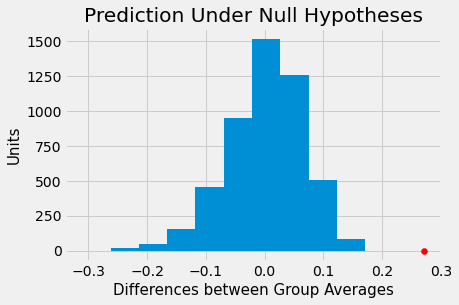

In [72]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)
plt.scatter(observed_difference,-0.05,color='red')

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.


In [68]:
count=0
for i in differences_df[0]:
    if i== 0.2709488724627878:
        count=count+1

    else:
        count=count-1
if count>0:
    print("yes")
else:
    print("nope")
    

nope


The observed difference in the original sample is about  0.2709488724627878. The observed value of the statistic and the predicted behavior of the statistic are plotted.

The conclusion of the test is that the data support the alternative more than they support the null. The average Global_sales of Strategy games is less than the average global sales of Action games.

In [76]:
np.count_nonzero(differences >= observed_difference) /differences.size

0.0

The empirical P-value is 0.0, meaning that none of the 5,000 observed samples resulted in a difference of 0.2709488724627878. the average sales of stratergy games is less than action games. the low P-value favours the alternative hypothesis. hence reject the null hypothesis.

Avg sales of strategy games is less than action games.